# Memoization & Dynamic Programming 

### Topics to discuss today:

<ul>
    <li>Time and Space Complexity  of recursive fibonnaci</li>
    <li>The fibonacci Tree</li>
    <li>storing solutions to sub problems</li>
    <li>solving popular problems</li>
</ul>
<br><br><br><br>

### The Fibonacci sequence

In [1]:
# Write out a function to find the nth number in the fibonnaci sequence
def fib(n):
    if n <= 1:
        return n
    else:
        return fib(n-1) + fib(n-2)

fib(5)


    

5

In [5]:
# iterative fibonacci
def fibonacci_iter(n):
    fib_list = [0, 1]

    for i in range (2, n + 1):
        next_fib = fib_list[-1] + fib_list[-2]
        fib_list.append(next_fib)

    return fib_list
fibonacci_iter(40)

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229,
 832040,
 1346269,
 2178309,
 3524578,
 5702887,
 9227465,
 14930352,
 24157817,
 39088169,
 63245986,
 102334155]

In [6]:
#Dealing with Time space and recursion
def dib(n):
    if n <= 1:
        return n
    else:
        return dib(n-1) # extrea function call on the stack O(n)

dib(10)

1

Calculating the time space complexity of the Fibbonacci sequence


## Trees

the fibonacci sequence can be visualized using a tree structure. Lets look at the elements of a tree before discussing the fibonnaci tree:

<img src="https://www.tutorialspoint.com/data_structures_algorithms/images/binary_tree.jpg" style="height:400px;">

Let's look at the fibonnaci tree:

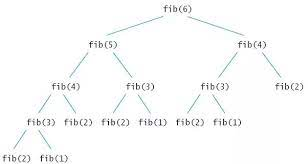

## Memoization

#### What is it?

In computing, memoization or memoisation is an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again. Memoization has also been used in other contexts (and for purposes other than speed gains), such as in simple mutually recursive descent parsing.

#### When should we use it?

Some problems are largely made of <b>overlapping subproblems</b>. When we find our code is solving the same problem multiple times over it's a good idea to store them so we don't have to recompute those solutions. This is known as Dynamic Programming 

In [11]:
#The super power of Dictionaries
def fib(n, cache = {}):
    if n in cache:
        return cache[n]
    if n <= 1:
        return n
    else:
        cache[n] = fib(n - 1) + fib(n - 2)
        return cache[n]

fib(20)


6765

## Decorators

<p>A Decorator in Python is a function that takes another function that as an argument, and returns a 3rd function. Decorators are extremely useful as they allow the extenson of an existing function, without any of the original source code.</p>

In [13]:
#Decorator Syntax

def shout(words):
    return words.upper()

print(shout("Hello there!")) # regular function call

# store shout function to another variable name
yell = shout

# calling yell which is set to the shout function

print(yell("General Kenobi"))


HELLO THERE!
GENERAL KENOBI


In [15]:
# passing function as an argument 
def whisper(words):
    return words.lower()

# defining a function that takes another function as a parameter
def say_something(func):
    return func("My name is Ryan and i like to party!")

print(say_something(shout))
# func as a parameter in the say_something function looks kinda like this:
# func = shout
# func = whisper
print(say_something(whisper))

MY NAME IS RYAN AND I LIKE TO PARTY!
my name is ryan and i like to party!


In [16]:
# decorator do opposite
# instead of passing another function as an argument to extend the utility of that function
# we pass the function we want to exted the utility of

def say_something():
    return "My name is Razvan and i like to play games whenever i can"

def uppercase_decorator(function):


    # with decorators it is convention to have the outer function "wrap" the inner function
    # the inner function is a wrapper function where the actual argument is called/used

    # our inner function can access the outer local variables like the function
    # having the function inside of the function helps with maintenance and debugging

    """
    Decorator to the UpperCase any argument passed into it
    """
    def wrapper():
        func = function()
        make_uppercase = func.upper()
        return make_uppercase
        
    return wrapper

return_func = uppercase_decorator(say_something)
return_func()

'MY NAME IS RAZVAN AND I LIKE TO PLAY GAMES WHENEVER I CAN'

In [17]:
help(uppercase_decorator)

Help on function uppercase_decorator in module __main__:

uppercase_decorator(function)
    Decorator to the UpperCase any argument passed into it



In [18]:
# decorator syntax
@uppercase_decorator
def say_hello():
    return "Hello there!"

In [19]:
say_hello()

'HELLO THERE!'

In [20]:
print(say_hello)

<function uppercase_decorator.<locals>.wrapper at 0x0000022C2F3EFEC0>


In [32]:
# passing arguments into a decorator
def uppercase_decorator(function):
    def wrapper(*args, **kwargs):
        func = function(*args, **kwargs)
        make_upper = func.upper() # call the original function with any passed arguments and keyword arguments
        return make_upper # applying the uppercase transformation
    return wrapper

@uppercase_decorator
def teletubbies(*args):
    teletubbies = ",".join(args)

    return f"{teletubbies}, Say hello"
    

In [33]:
teletubbies("Tinky Winky", "Dipsy", "Lala", "Po")

'TINKY WINKY,DIPSY,LALA,PO, SAY HELLO'

In [35]:
my_tubbies = "Tinky Winky, Dipsy, Lala, Po"
result = teletubbies(my_tubbies)
print(result)

TINKY WINKY, DIPSY, LALA, PO, SAY HELLO


## TwoSum Problem

Given an array of integers, return the two numbers such that they add up to a specific target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

In [ ]:
# In Python, the space complexity of an algorithm can be quadratic if the algorithm uses a nested loop and 
# creates a new data structure for each iteration of the outer loop, and the size of the new data structure is 
# proportional to the number of iterations of the inner loop. For example, a nested loop that creates a new list 
# for each iteration of the outer loop, and appends to the list for each iteration of the inner loop, would have a 
# space complexity of O(n^2), where n is the number of iterations of the outer loop."

In [38]:
def twoSum(array, target):
    dict1 = {}
    sum_total = 0
    the_target = target
    for i in array:
        if i not in dict1:
            dict1[i] = i
           
    for a in dict1:
        for b in dict1:
            if a + b == the_target:
                print(dict[a], dict[b])
                return a, b
            

twoSum([11, 12, 1, 22, 14, 3, 14, 5, 23], 19)

dict[14] dict[5]


(14, 5)

In [39]:
arr = [5, 1, 3, 9, 10, 6]
target = 10

def two_sum(arr, target):
    for i in range(len(arr)):
        for j in range(len(arr)):
            if arr[i] + arr[j] == target and i != j:
                return arr[i], arr[j]
two_sum(arr, target)

(1, 9)

In [2]:
#### THIS IS THE HOMEWORK #####
# It is linear time and space complexity because i have a for loop that runs only once and my data is stored in my empty dictionary

def sum_pairs(ints, s):
    mydict = {}

    for i, num in enumerate(ints):
        target = s - num
        if target in mydict:
            return [target, num]
        mydict[num] = i

    return None


print(sum_pairs([11, 3, 7, 5], 10))  
print(sum_pairs([4, 3, 2, 3, 4], 6))  
print(sum_pairs([0, 0, -2, 3], 2))    
print(sum_pairs([10, 5, 2, 3, 7, 5], 10))

[3, 7]
[4, 2]
None
[3, 7]
